# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

# Importando PANDAS e definindo dataframes

In [92]:
# Importando o pandas

import pandas as pd

# Obtendo dataframes pelos arquivos
cadastro_func_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
cadastro_clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
base_servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

# Exibindo o dataframe
display(cadastro_func_df)
display(cadastro_clientes_df)
display(base_servicos_df)


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


# Valor Total da Folha Salarial
## Qual foi o gasto total com salários de funcionários pela empresa?

### Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários

In [109]:
# Definindo variáveis
salario_bruto_df = cadastro_func_df[['Impostos', 'Beneficios', 'Salario Base', 'VT', 'VR']]

# Verificando tipos das colunas
# salario_bruto_df.info()

# Trocando vírgulas por ponto
# salario_bruto_df = salario_bruto_df.replace({',': '.'}, regex=True)

# Modificando colunas para numérico
# salario_bruto_df['Impostos'] = pd.to_numeric(salario_bruto_df['Impostos'])
# salario_bruto_df['Beneficios'] = pd.to_numeric(salario_bruto_df['Beneficios'])

# Verificando tipos das colunas
# salario_bruto_df.info()

# Fazendo coluna de salário bruto
salario_bruto_df['Salario Bruto'] = salario_bruto_df.sum(axis=1)

# Alterando ordem das colunas
salario_bruto_df = salario_bruto_df[['Salario Base', 'Impostos', 'Beneficios', 'Salario Bruto']]

# Somar todos salários brutos
total_bruto = salario_bruto_df['Salario Bruto'].sum(axis=0)

# Respondendo a pergunta
print(f'O gasto total com salários considerando também benefícios e impostos foi de R${total_bruto:,.2f}')

display(salario_bruto_df)


O gasto total com salários considerando também benefícios e impostos foi de R$2,717,493.22


C:\Users\Diego\AppData\Local\Temp\ipykernel_9556\3947002876.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salario_bruto_df['Salario Bruto'] = salario_bruto_df.sum(axis=1)


,Salario Base,Impostos,Beneficios,Salario Bruto
0,21910,10955.0,4382.0,38208.04
1,5404,2702.0,1080.8,9915.36
2,16066,8033.0,3213.2,28195.32
3,21305,10652.5,4261.0,36962.66
4,5098,2549.0,1019.6,9568.36
...,...,...,...,...
109,10793,5396.5,2158.6,19104.18
110,4048,2024.0,809.6,7875.92
111,24596,12298.0,4919.2,42616.32
112,5078,2539.0,1015.6,9605.88


# Qual foi o faturamento da empresa?
## Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos

In [110]:
# Dataframes que usaremos para responder
# display(cadastro_clientes_df)
# display(base_servicos_df)

# Separando em dois dataframes mais "limpos"
contratos_valor_mensal_df = cadastro_clientes_df[['ID Cliente', 'Valor Contrato Mensal']]
contratos_de_tempo_df = base_servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']]

# Exibindo os dataframes
# display(contratos_valor_mensal_df)
# display(contratos_de_tempo_df)

# Juntando os dataframes com base no ID do cliente
contratos_tempo_e_valor_df = contratos_de_tempo_df.merge(contratos_valor_mensal_df, on='ID Cliente')

# Exibindo o dataframe juntado
# display(contratos_tempo_e_valor_df)

# Criando uma coluna que seja produto do Tempo Total de Contrato (Meses) e Valor Contrato Mensal
contratos_tempo_e_valor_df['Faturamento do Cliente'] = contratos_tempo_e_valor_df['Tempo Total de Contrato (Meses)']*contratos_tempo_e_valor_df['Valor Contrato Mensal']

# Exibindo o novo dataframe
display(contratos_tempo_e_valor_df)

# Somando todo o faturamento
faturamento_total = (contratos_tempo_e_valor_df['Faturamento do Cliente'].sum(axis=0))

# Respondendo a pergunta
print(f'O faturamento total da empresa considerando o tempo e valor no contrato foi de R${faturamento_total:,.2f}')


,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Faturamento do Cliente
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590


O faturamento total da empresa considerando o tempo e valor no contrato foi de R$5,519,160.00


# Qual o % de funcionários que já fechou algum contrato?
__Sugestão:__ na base de serviços temos o funcionário que fechou cada serviço.\
Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular __Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais__<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 

In [58]:
# Contando quantos funcionários fecharam contratos
Qtde_Funcionarios_Fecharam_Serviço = len(base_servicos_df['ID Funcionário'].unique())

# Contando quantos funcionários a empresa tem
Qtde_Funcionários_Totais = len(cadastro_func_df['ID Funcionário'])

# Calculando o percentual
percent_fecharam_servico = Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais

# Respondendo a pergunta
print(f'O percentual de funcionários que fecharam serviços foi de {percent_fecharam_servico:.2%}')


O percentual de funcionários que fecharam serviços foi de 86.84%


# Calcule o total de contratos que cada área da empresa já fechou

<Axes: title={'center': 'Contratos fechados por área da empresa'}, ylabel='Area'>

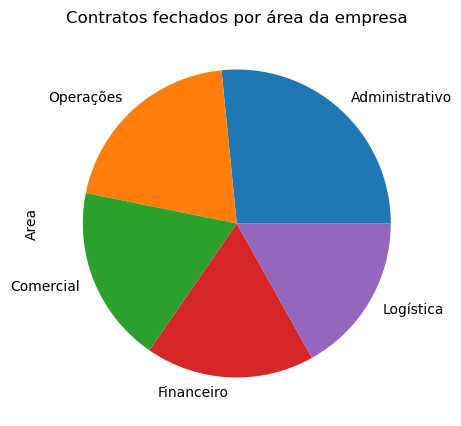

In [111]:
# Criando um dataframe com ID Funcionário e Area
funcionario_e_area = cadastro_func_df[['ID Funcionário', 'Area']]
# display(funcionario_e_area)

# Criando um dataframe com ID Funcionário e ID Cliente
funcionario_e_cliente = base_servicos_df[['ID Funcionário', 'ID Cliente']]
# display(funcionario_e_cliente)

# Juntando os dataframes
funcionario_cliente_e_area = funcionario_e_cliente.merge(funcionario_e_area, on='ID Funcionário')
# display(funcionario_cliente_e_area)

# Criando um dataframe de quantidade de contratos por área
qtde_contrato_areas = funcionario_cliente_e_area['Area'].value_counts()

# Plotando um gráfico
qtde_contrato_areas.plot(figsize=(15, 5), kind='pie', title='Contratos fechados por área da empresa')


# Calcule o total de funcionários por área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

<Axes: title={'center': 'Quantidade de funcionários por área da empresa'}>

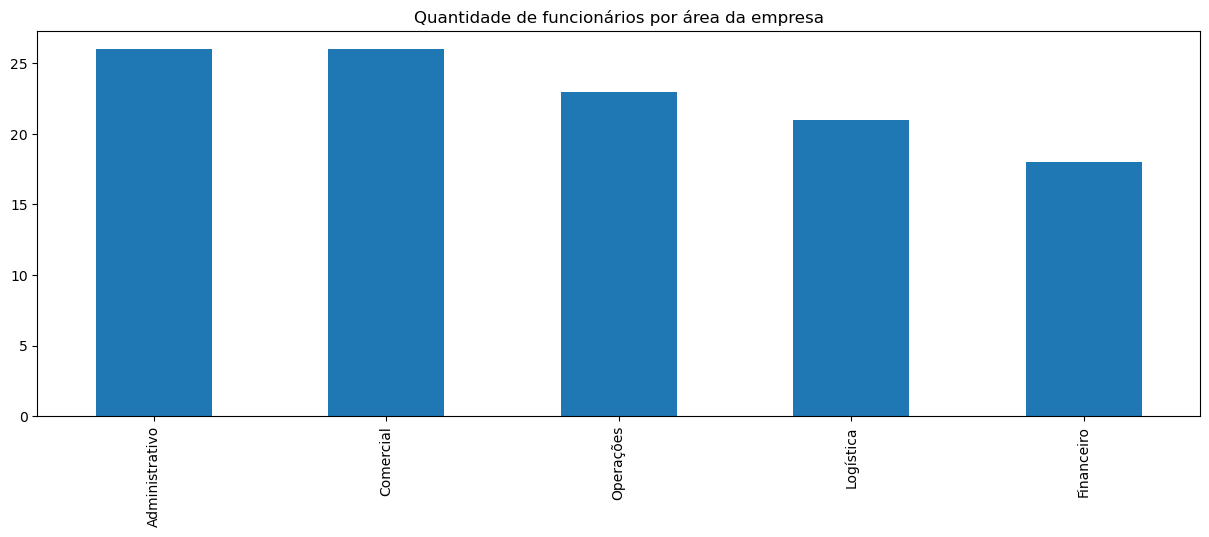

In [82]:
# Criando um dataframe de quantidade funcionários por área
qtd_func_por_area = cadastro_func_df['Area'].value_counts()
display(qtd_func_por_area)

# Plotando um gráfico
qtd_func_por_area.plot(figsize=(15, 5), kind='bar', title='Quantidade de funcionários por área da empresa')


# Qual o ticket médio mensal (faturamento médio mensal) dos contratos?
## Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

In [88]:
# Obtendo o faturamento médio mensal
faturamento_medio_mensal = cadastro_clientes_df['Valor Contrato Mensal'].mean()

# Respondendo a pergunta
print(f'O faturamento mensal dos contratos da empresa é de R${faturamento_medio_mensal:.2f}')


O faturamento mensal dos contratos da empresa é de R$2502.56
